In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import plotly.express as px
import pandas as pd

# gt = open("/home/eam/MasterThesis/Thesis/TrackEval/data/gt/kitti_lidar/kitti_2d_box_train/label_02/0016.txt","r")
lines = gt.readlines()
tracklets = {}
for line in lines:
    splitted = line.split(" ")
    if splitted[2] == "Pedestrian":
        _id = int(splitted[1])
        loc = map(float, splitted[-4:-1])
        if _id in tracklets:
            tracklets[_id].append(list(loc))
        else:
            tracklets[_id] = [list(loc)]

In [3]:
sorted(tracklets.keys())
a = tracklets.pop(12)

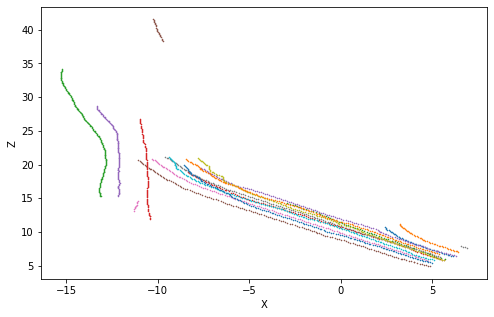

In [7]:
plt.rcParams["figure.figsize"] = (8, 5)
for key, value in tracklets.items():
    np_val = np.array(value)
    plt.scatter(np_val[:,0], np_val[:,2],marker=".",s=10, lw=0)
plt.xlabel("X")
plt.ylabel("Z")
plt.savefig("2d-ipm.pdf", bbox_inches='tight')
plt.show()

In [20]:
ds = np.empty(shape=(0,5))
for key, value in tracklets.items():
    np_val = np.array(value)
    for row in value: 
        ds = np.vstack((ds,[*row,key,100]))
df = pd.DataFrame(ds)       
fig = px.scatter_3d(df, x=0, y=1, z=2, color=3, size=4, size_max=18)

fig.show()


In [6]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
for key, value in tracklets.items():
    np_val = np.array(value)
    ax.scatter(np_val[:,0], np_val[:,2], np_val[:,1],marker=".",s=10, lw=0)
ax.view_init(30,-75)
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_zlabel("Y")
plt.savefig("3d-ipm.pdf", bbox_inches='tight')
plt.show()

In [9]:
gt = open("/home/eam/MasterThesis/Thesis/TrackEval/data/gt/kitti_lidar/kitti_2d_box_train/label_02/0016.txt","r")
lines = gt.readlines()
tracklets_img = {}
for line in lines:
    splitted = line.split(" ")
    if splitted[2] == "Pedestrian" and int(splitted[0]) < 126:
        _id = int(splitted[1])
        loc = map(float, splitted[6:10])
        if _id in tracklets_img:
            tracklets_img[_id].append(list(loc))
        else:
            tracklets_img[_id] = [list(loc)]

(370, 1224, 3)


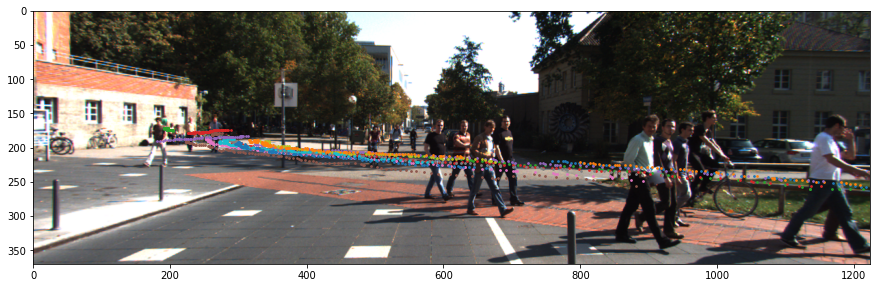

In [11]:
plt.rcParams['figure.figsize'] = [15, 15]
frame = plt.imread("/home/eam/KittiDs/data_tracking_image_2/training/image_02/0016/000125.png")
print(frame.shape)
plt.imshow(frame, zorder=0, extent=[0,1224,370,0])
for key, value in tracklets_img.items():
    np_val = np.array(value)
    plt.scatter(((np_val[:,0]+np_val[:,2])/2).astype(int), ((np_val[:,1]+np_val[:,3])/2).astype(int), marker=".",s=30, lw=0)
plt.savefig("tracker_result_2d.png", bbox_inches='tight')
plt.show()